<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B5%D0%B1_%D1%81%D0%B5%D1%80%D0%B2%D0%B5%D1%80%D0%B0_%D0%B8_%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо подготовить нейронную сеть для распознавания MNIST, загрузить на Heroku и запустить веб сервис:

* Подготовить модель для распознавания MNIST
* Подключить Git
* Подключить Heroku
* Загрузить модуль на Heroku и проверить работу веб-сервиса

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем для to_categorical
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-preprocessing, tensorboard, keras, tensorflow-io-gcs-filesystem, grpcio, astunparse, opt-einsum, h5py, six, typing-extensions, termcolor, tensorflow-estimator, gast, setuptools, absl-py, libclang, google-pasta, protobuf, wrapt, flatbuffers, numpy
Required-by: kapre


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? 
Your response ('') was not one of the expected responses: y, n
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, gast, grpcio, protobuf, h5py, setuptools, flatbuffers, packaging, tensorflow-io-gcs-filesystem, wrapt, six, typing-extensions, libclang, tensorflow-estimator, google-pasta, astunparse, tensorboard, keras-preprocessing, termcolor, keras, opt-einsum, absl-py
Required-by: kapre


In [ ]:
!pip install tensorflow #For GPU support

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.2 kB/s 


In [ ]:
!pip show tensorflow

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

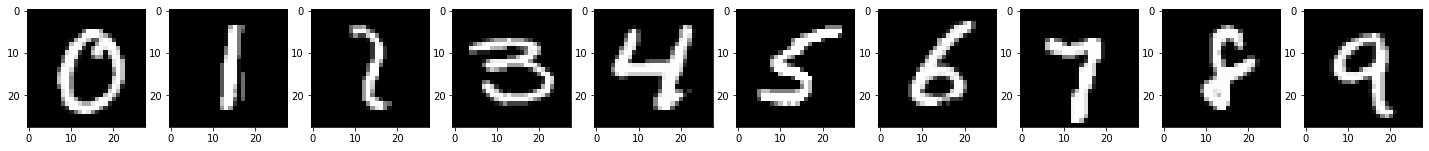

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# 
batch_size = 128 

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.9538WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9203cef950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 133s 281ms/step - loss: 0.1502 - accuracy: 0.9538 - val_loss: 0.0465 - val_accuracy: 0.9843
Epoch 2/15
469/469 [==============================] - 127s 271ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0413 - val_accuracy: 0.9864
Epoch 3/15
469/469 [==============================] - 127s 270ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0343 - val_accuracy: 0.9881
Epoch 4/15
462/469 [============================>.] - ETA: 1s - loss: 0.0265 - accuracy: 0.9911

In [ ]:
# Пересохранение обученной модели полностью (веса и архитектура)
model.save('model_fmr_all.h5')

In [ ]:
segment_file = '''

from tensorflow.keras.models import load_model
MODEL_NAME =   'model_fmr_all.h5'
import numpy as np
from PIL import Image 
model = load_model(MODEL_NAME) # Загружаем веса
INPUT_SHAPE = (28, 28, 1)


def process(image_file):
    image = Image.open(image_file).convert('L') # Открываем обрабатываемый файл
    resized_image = image.resize((INPUT_SHAPE[1], INPUT_SHAPE[0])) # Изменяем размер изображения в соответствии со входом сети
    array = np.array(resized_image, dtype='float64') / 255 # Меняем размерность тензора для подачи в сеть
    array = array.reshape(-1, 28, 28, 1)
    cls_image = np.argmax(model.predict(array))

    return cls_image
'''

with open('segment.py', 'w') as file:
  file.write(segment_file)

In [ ]:
app_file = '''

import streamlit as st
from PIL import Image 
from segment import process

st.title('Распознавание MIST')

image_file = st.file_uploader('Загрузить изображение', type=['png', 'jpg']) # Добавляем загрузчик файлов

if not image_file is None: # Выполняем блок, если загружено изображение
    image = Image.open(image_file) # Открываем изображение
    results = process(image_file) # Обрабатываем изображение с помощью функции, реализованной в другом файле
    st.write('Цифра на картинке: ', results)
'''

with open('app.py', 'w') as file:
  file.write(app_file)

In [ ]:
setup_file = '''

mkdir -p ~/.streamlit/
echo "\
[server]\n\
headless = true\n\
port = $PORT\n\
enableCORS = false\n\
\n\
" > ~/.streamlit/config.toml

'''

with open('setup.sh', 'w') as file:
  file.write(setup_file)

In [ ]:
proc_file = 'web: sh setup.sh && streamlit run app.py'

with open('Procfile', 'w') as file:
  file.write(proc_file)

In [ ]:
requirements_file = '''

streamlit==0.82.0
tensorflow-cpu==2.5.0

'''

with open('requirements.txt', 'w') as file:
  file.write(requirements_file)

In [ ]:
!rm -rf sample_data

In [ ]:
!git --version

git version 2.17.1


In [ ]:
!git config --global user.email "venerakild@gmail.com"
!git config --global user.name "Venera"

In [ ]:
!curl https://cli-assets.heroku.com/install-ubuntu.sh | sh > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1232  100  1232    0     0  39741      0 --:--:-- --:--:-- --:--:-- 39741
+ dpkg -s apt-transport-https
+ echo deb https://cli-assets.heroku.com/apt ./
+ dpkg -s heroku-toolbelt
+ true
+ curl https://cli-assets.heroku.com/apt/release.key
+ apt-key add -
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1753  100  1753    0     0  64925      0 --:--:-- --:--:-- --:--:-- 64925
+ apt-get update
+ apt-get install -y heroku


In [ ]:
!heroku --version

heroku/7.60.2 linux-x64 node-v14.19.0


In [ ]:
LOGIN = 'venerakild@gmail.com' # Укажите свой логин
API_KEY = '896fb93e-3e28-4172-8216-726f612d6ad7' # Укажите свой API-key

auth_file = '''machine api.heroku.com
  login {login}
  password {password}
machine git.heroku.com
  login {login}
  password {password}
'''.format(login=LOGIN, password=API_KEY)

with open('/root/.netrc', 'w') as file:
  file.write(auth_file)

In [ ]:
!git init
!git add .
!git commit -m "My first commit"

Reinitialized existing Git repository in /content/.git/
On branch master
nothing to commit, working tree clean


In [ ]:
!heroku create

Creating app... ⣾ 
⣽⣻⢿⡿⣟⣯⣷⣾⣽⣻⢿⡿Creating app... done, ⬢ powerful-tundra-14607
https://powerful-tundra-14607.herokuapp.com/ | https://git.heroku.com/powerful-tundra-14607.git


In [ ]:
!git remote -v

heroku	https://git.heroku.com/powerful-tundra-14607.git (fetch)
heroku	https://git.heroku.com/powerful-tundra-14607.git (push)


In [ ]:
!git push heroku master

Counting objects: 25, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (16/16), done.
Writing objects: 100% (25/25), 16.54 MiB | 3.39 MiB/s, done.
Total 25 (delta 2), reused 0 (delta 0)
remote: Compressing source files... done.
remote: Building source:
remote: 
remote: -----> Building on the Heroku-20 stack
remote: -----> Determining which buildpack to use for this app
remote: -----> Python app detected
remote: -----> No Python version was specified. Using the buildpack default: python-3.10.5
remote:        To use a different version, see: https://devcenter.heroku.com/articles/python-runtimes
remote: -----> Installing python-3.10.5
remote: -----> Installing pip 22.1.2, setuptools 60.10.0 and wheel 0.37.1
remote: -----> Installing SQLite3
remote: -----> Installing requirements with pip
remote:        Collecting streamlit==0.82.0
remote:          Downloading streamlit-0.82.0-py2.py3-none-any.whl (8.2 MB)
remote:        ERROR: Ignored the following versions that re